Data from here: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [59]:
from bs4 import BeautifulSoup as bsoup
import requests
import pandas as pd
import numpy as np
import string

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library 

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from scipy.stats.mstats import normaltest
from scipy.stats import boxcox

# Data from UCI

In [60]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2021-07-27 19:45:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip.1’

Bike-Sharing-Datase 100%[===================>] 273.43K   527KB/s    in 0.5s    

2021-07-27 19:45:41 (527 KB/s) - ‘Bike-Sharing-Dataset.zip.1’ saved [279992/279992]



In [61]:
from zipfile import ZipFile

with ZipFile('/content/Bike-Sharing-Dataset.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [62]:
day=pd.read_csv('day.csv')

In [63]:
day.dteday = day.dteday.apply(pd.to_datetime)
day['day'] = day['dteday'].dt.day
day.set_index(day.dteday,inplace=True)

In [64]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2011-01-02,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2011-01-03,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
2011-01-04,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
2011-01-05,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [65]:
day.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
day                    int64
dtype: object

In [66]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,15.738714
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,8.809949
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,8.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,16.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,23.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,31.000000


In [67]:
#instant	dteday	season	yr	mnth	holiday	weekday	workingday	weathersit	temp	atemp	hum	windspeed	casual	registered	cnt

- set index to dteday
- autocorrelations

In [68]:
day.index.max()-day.index.min()

Timedelta('730 days 00:00:00')

# Daily Rides

In [69]:
fig = go.Figure(data=go.Scatter(x=day.index, y=day['cnt'], mode='lines', marker=dict(color='green')))
fig.update_layout(title='Rides per Day', xaxis_title='Date', yaxis_title='Rides per Month')
fig.show()

# Monthly Rides

In [70]:
rpm=day.resample('M').sum()
fig = go.Figure(data=go.Scatter(x=rpm.index, y=rpm['cnt'], mode='lines', marker=dict(color='green')))
fig.update_layout(title='Rides per Month', xaxis_title='Date', yaxis_title='Rides per Month')
fig.show()

In [71]:
day.resample('M').sum()['cnt']

dteday
2011-01-31     38189
2011-02-28     48215
2011-03-31     64045
2011-04-30     94870
2011-05-31    135821
2011-06-30    143512
2011-07-31    141341
2011-08-31    136691
2011-09-30    127418
2011-10-31    123511
2011-11-30    102167
2011-12-31     87323
2012-01-31     96744
2012-02-29    103137
2012-03-31    164875
2012-04-30    174224
2012-05-31    195865
2012-06-30    202830
2012-07-31    203607
2012-08-31    214503
2012-09-30    218573
2012-10-31    198841
2012-11-30    152664
2012-12-31    123713
Freq: M, Name: cnt, dtype: int64

# Auto-correlation Plots

Daily data Autocorrelation Plots


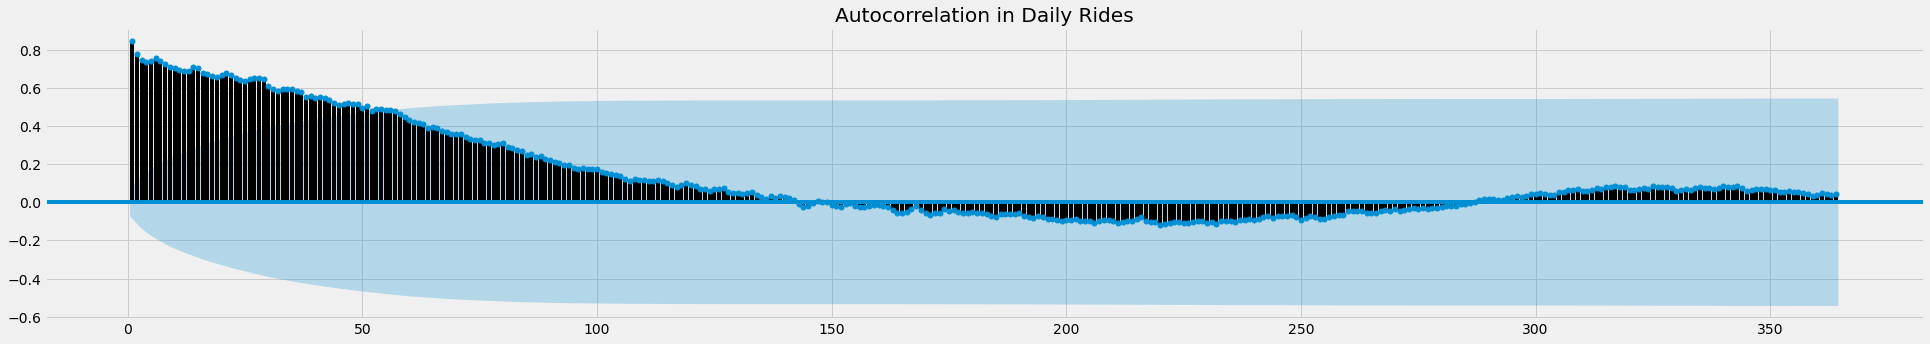

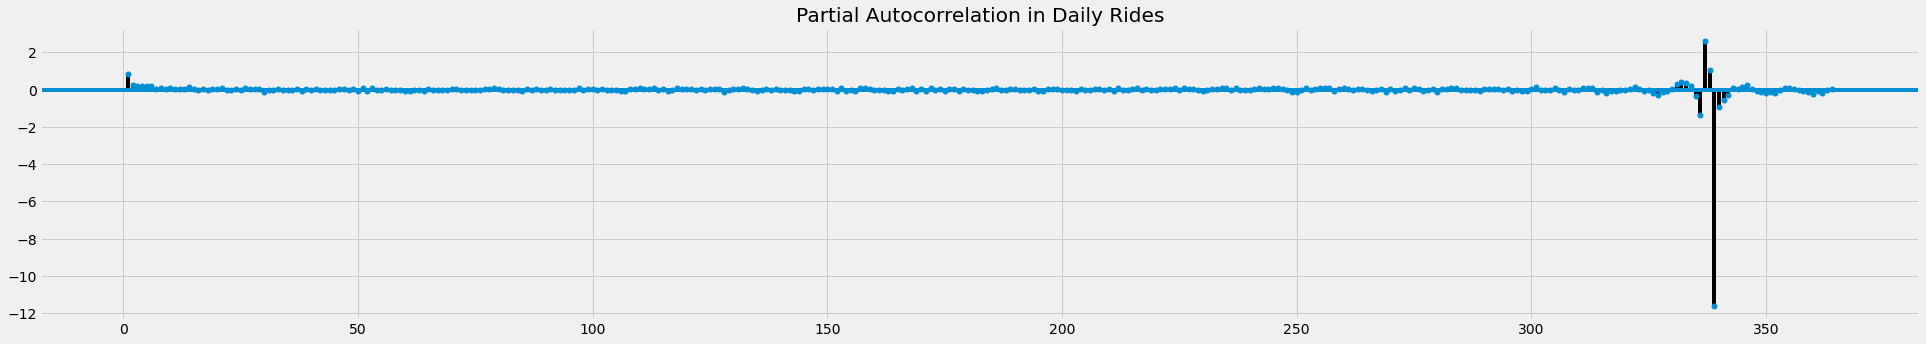

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

fig, ax = plt.subplots(figsize=(30,5))    
print('Daily data Autocorrelation Plots')
acf_plot = plot_acf(day['cnt'], lags=range(1,365), title='Autocorrelation in Daily Rides', ax=ax)

fig, ax = plt.subplots(figsize=(30,5))    
pacf_plot = plot_pacf(day['cnt'], lags=range(1,365), title='Partial Autocorrelation in Daily Rides',ax=ax)



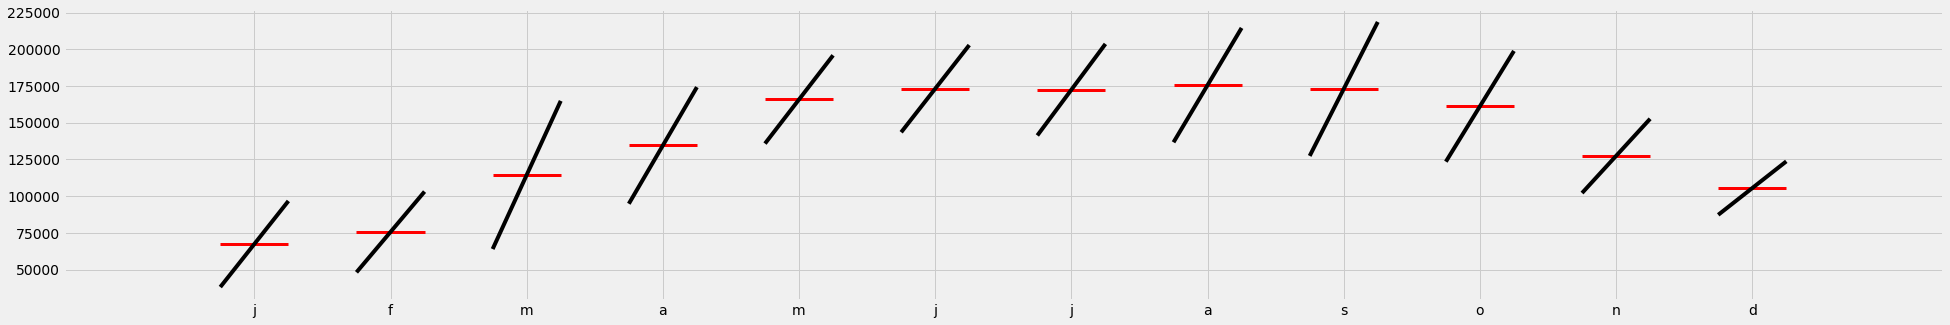

In [73]:
fig, ax = plt.subplots(figsize=(30,5))  
m_plot = month_plot(rpm['cnt'],ax=ax)

# Decomposition

In [74]:
rpd = day['cnt']
rpd.head()

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
Name: cnt, dtype: int64

========== Freq = 60============
========== Freq = 90============
========== Freq = 365============


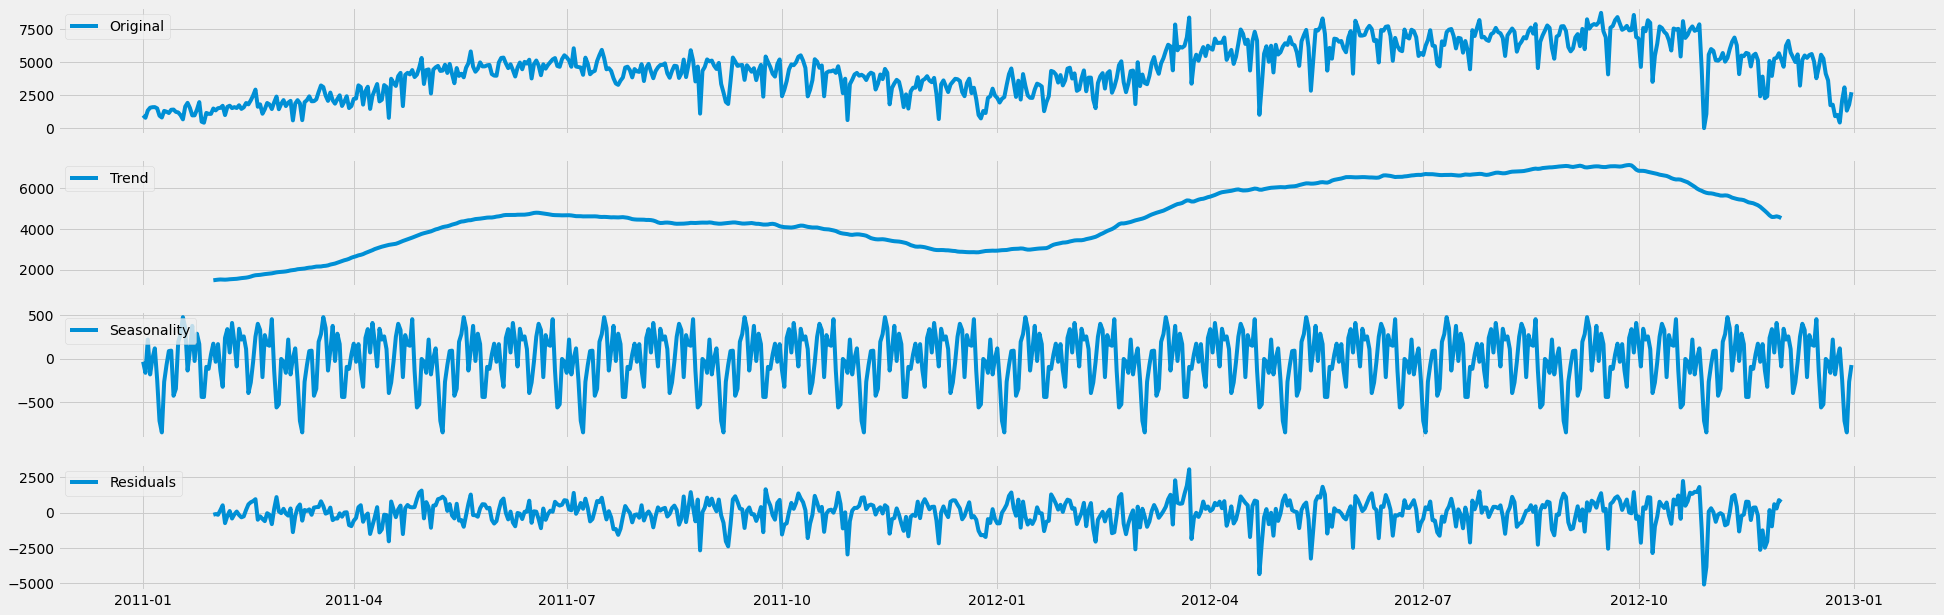

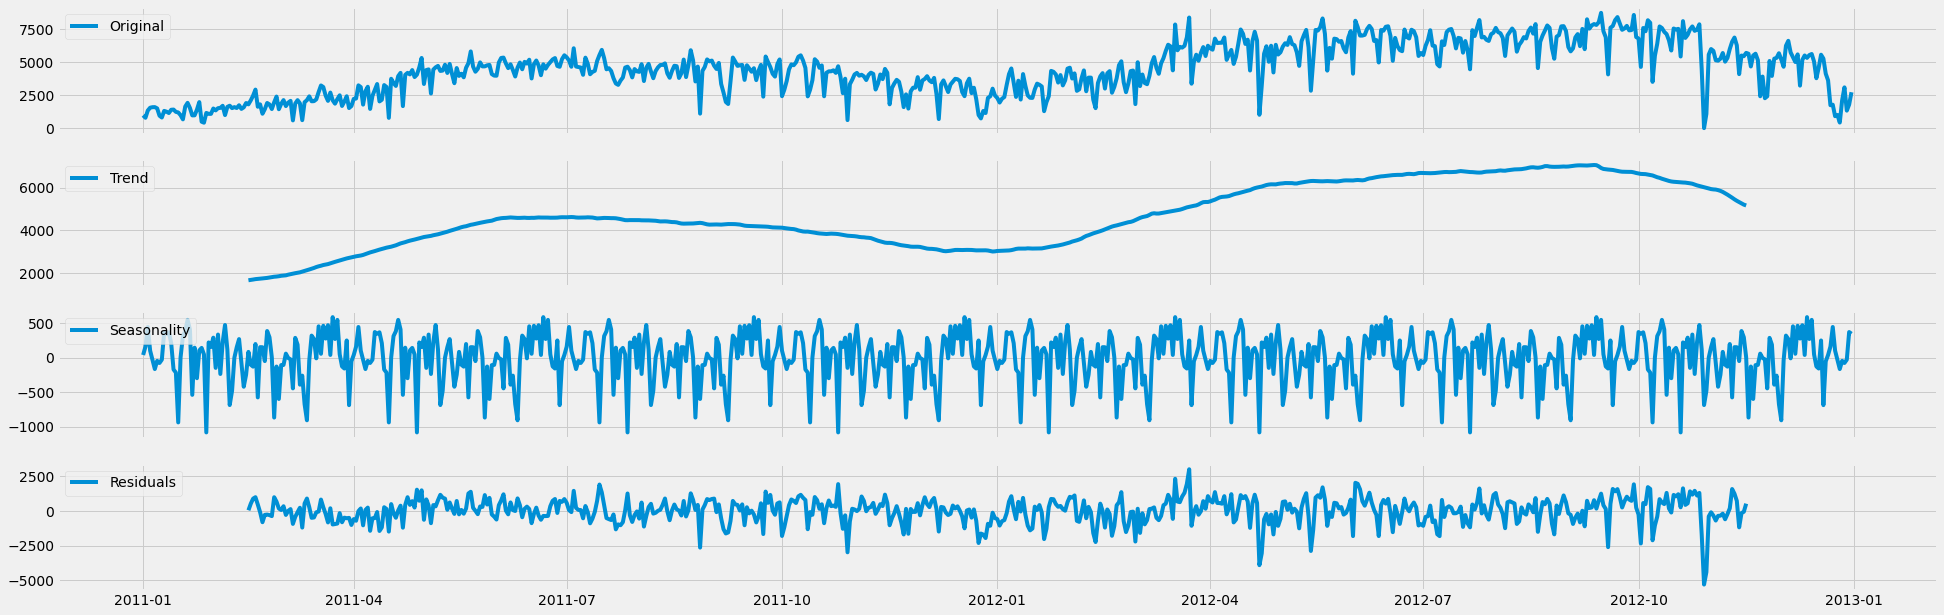

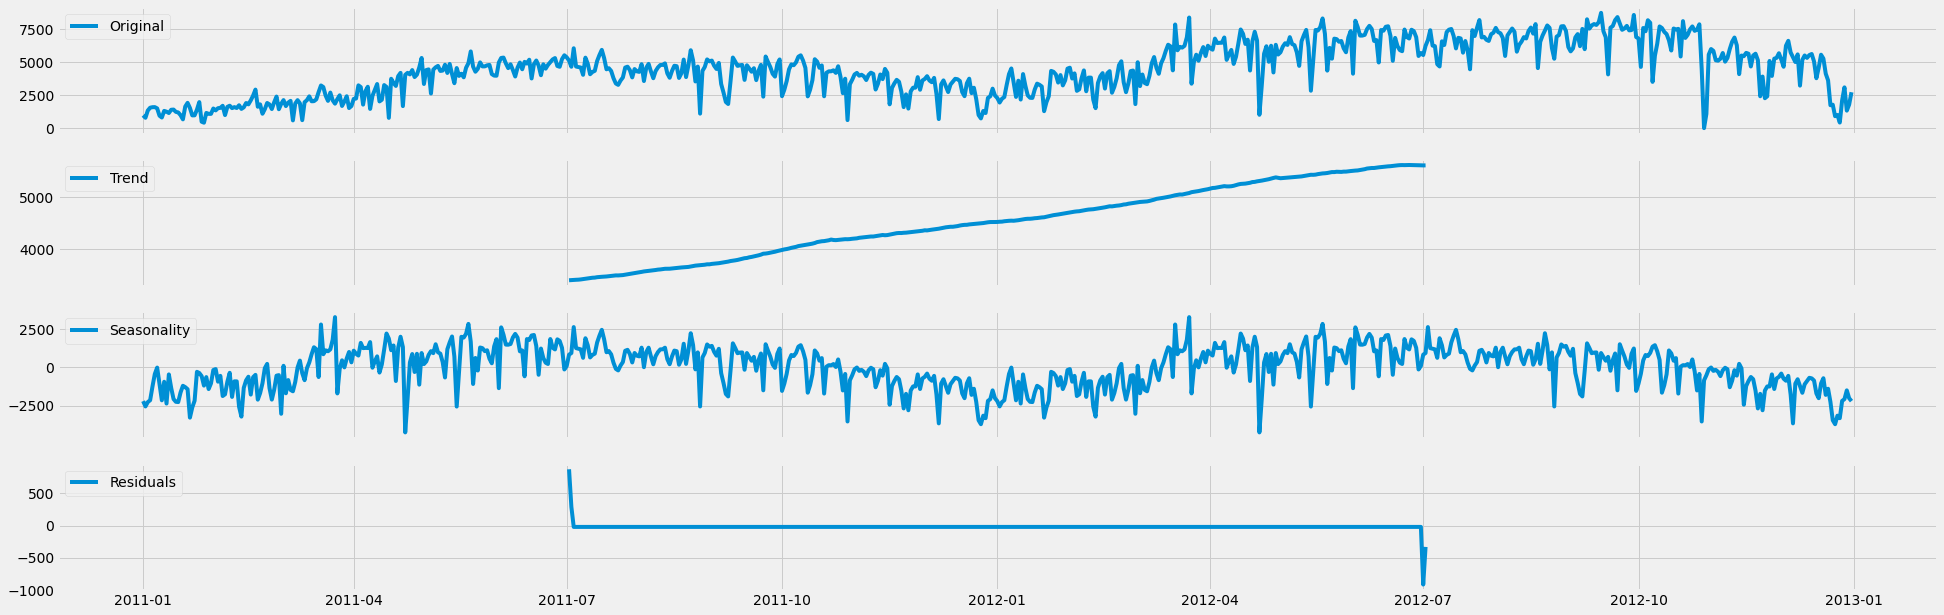

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
#for freq in 7, 15, 30, 60, 180, 365:
for freq in 60,90,365:
    print ('========== Freq = ' + str(freq) + '============')
    ss_decomposition = seasonal_decompose(x=rpd, model='additive',freq=freq)
    estimated_trend = ss_decomposition.trend
    estimated_seasonal = ss_decomposition.seasonal
    estimated_residual = ss_decomposition.resid

    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(30)
    

    axes[0].plot(rpd, label='Original')
    axes[0].legend(loc='upper left');

    axes[1].plot(estimated_trend, label='Trend')
    axes[1].legend(loc='upper left');

    axes[2].plot(estimated_seasonal, label='Seasonality')
    axes[2].legend(loc='upper left');

    axes[3].plot(estimated_residual, label='Residuals')
    axes[3].legend(loc='upper left');

# Stationarity

Variance, Augmented Dickey-Fuller Test, Nonstationary-to-Stationary Transformations

We accept the hypothesis that the trend is non-stationary (pvalue>0.05):

In [90]:
from statsmodels.tsa.stattools import adfuller

trend=estimated_trend.copy(deep=True)
trend.dropna(inplace=True)

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(trend)
print (adf)
print (pvalue)


-1.2757513807585186
0.6401917949580862


We accept the hypothesis that seasonal is non-stationary:

In [91]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(estimated_seasonal)
print (adf)
print (pvalue)



-1.9747453979275804
0.29775494230139476


We accept the hypothesis that residual is non-stationary:

In [92]:
resid=estimated_residual.copy(deep=True)
resid.dropna(inplace=True)

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(resid)
print (adf)
print (pvalue)


-0.43239897928220317
0.9045471522927583


# Smoothing

Try triple exponential smoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



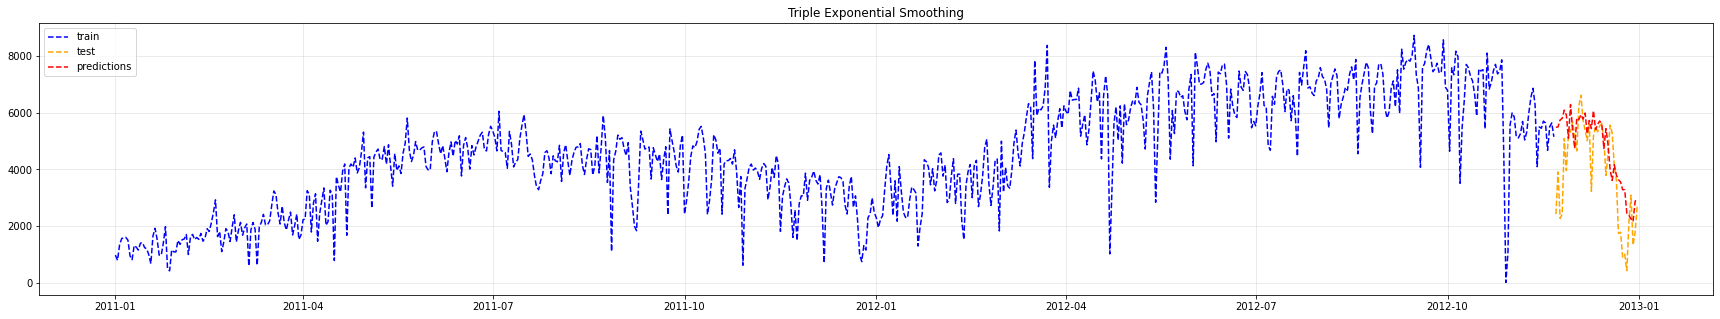

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

n=40

train = rpd[:-n]
test = rpd[-n:]
triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=180).fit(optimized=True)
triple_preds = triple.forecast(len(test))
#triple_mse = mse(test, triple_preds)
#print("Predictions: ", triple_preds)
#print("MSE: ", triple_mse)

fig, ax = plt.subplots(figsize=(30,5))    
plt.plot(rpd[:-n].index, train, 'b--', label="train")
plt.plot(rpd[-n:].index, test, color='orange', linestyle="--", label="test")
plt.plot(rpd[-n:].index, triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

# Full year prediction with triple exponential smoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



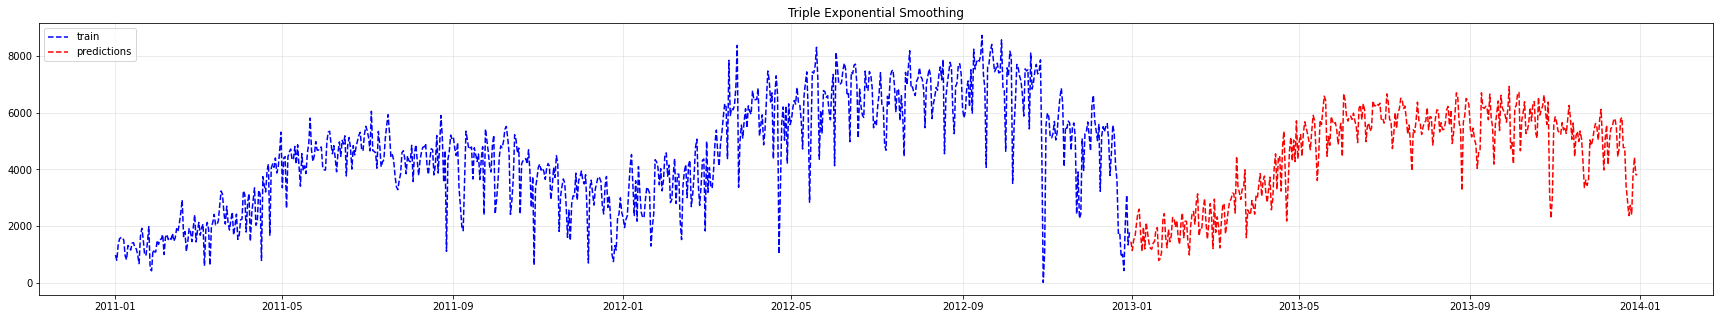

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

n=1

train = rpd[:-n]
#test = rpd[-n:]
triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=365).fit(optimized=True)
triple_preds = triple.forecast(365)

fig, ax = plt.subplots(figsize=(30,5))    
plt.plot(rpd[:-n].index, train, 'b--', label="train")

plt.plot(triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

# ARMA

# SARIMA / FBProphet

In [ ]:
rpd

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

In [ ]:
#rpd2=pd.DataFrame(data=rpd,columns=['ds','y'])
rpd2=pd.DataFrame(data=rpd)

In [ ]:
rpd2.rename(columns={'cnt':'y'},inplace=True)
#rpd2.index.rename('ds',inplace=True)
rpd2['ds']=rpd2.index

In [ ]:
rpd2

,y,ds
dteday,,
2011-01-01,985,2011-01-01
2011-01-02,801,2011-01-02
2011-01-03,1349,2011-01-03
2011-01-04,1562,2011-01-04
2011-01-05,1600,2011-01-05
...,...,...
2012-12-27,2114,2012-12-27
2012-12-28,3095,2012-12-28
2012-12-29,1341,2012-12-29


In [ ]:
from fbprophet import Prophet
m = Prophet()
m.fit(rpd2)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)
print(future.head())
print(future.tail())

          ds
0 2011-01-01
1 2011-01-02
2 2011-01-03
3 2011-01-04
4 2011-01-05
             ds
1091 2013-12-27
1092 2013-12-28
1093 2013-12-29
1094 2013-12-30
1095 2013-12-31


In [ ]:
forecast = m.predict(future)
print(forecast.columns)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


,ds,yhat,yhat_lower,yhat_upper
1091,2013-12-27,5652.278047,4280.265654,6876.475987
1092,2013-12-28,5568.985005,4375.376138,6870.924307
1093,2013-12-29,5271.797263,4075.742012,6515.477022
1094,2013-12-30,5417.560173,4169.761160,6790.111567
1095,2013-12-31,5633.194627,4272.264697,6862.720376


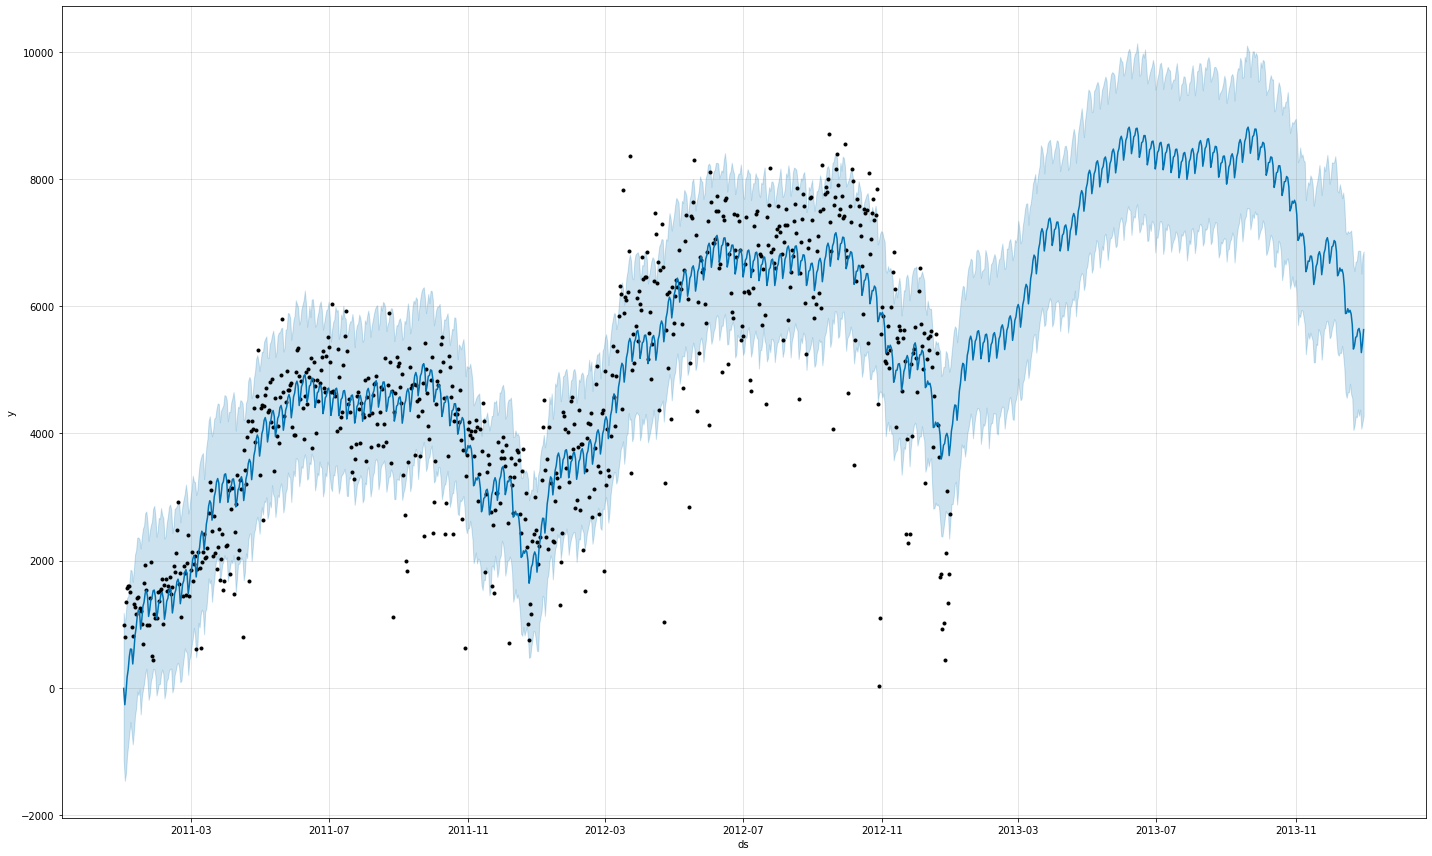

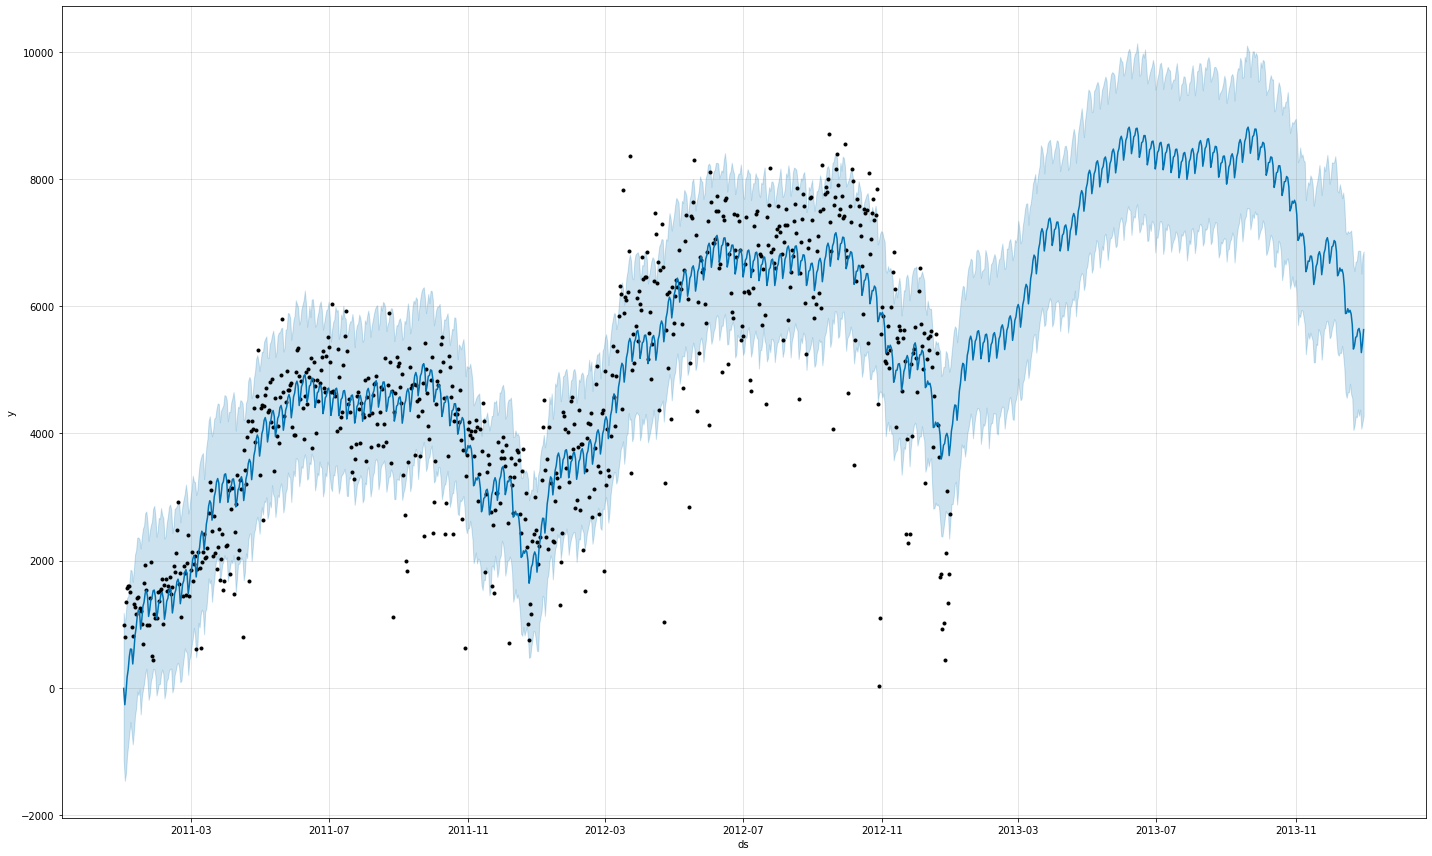

In [ ]:
from fbprophet.plot import plot

plot(m, forecast, figsize=(20, 12))

#m.plot(forecast);

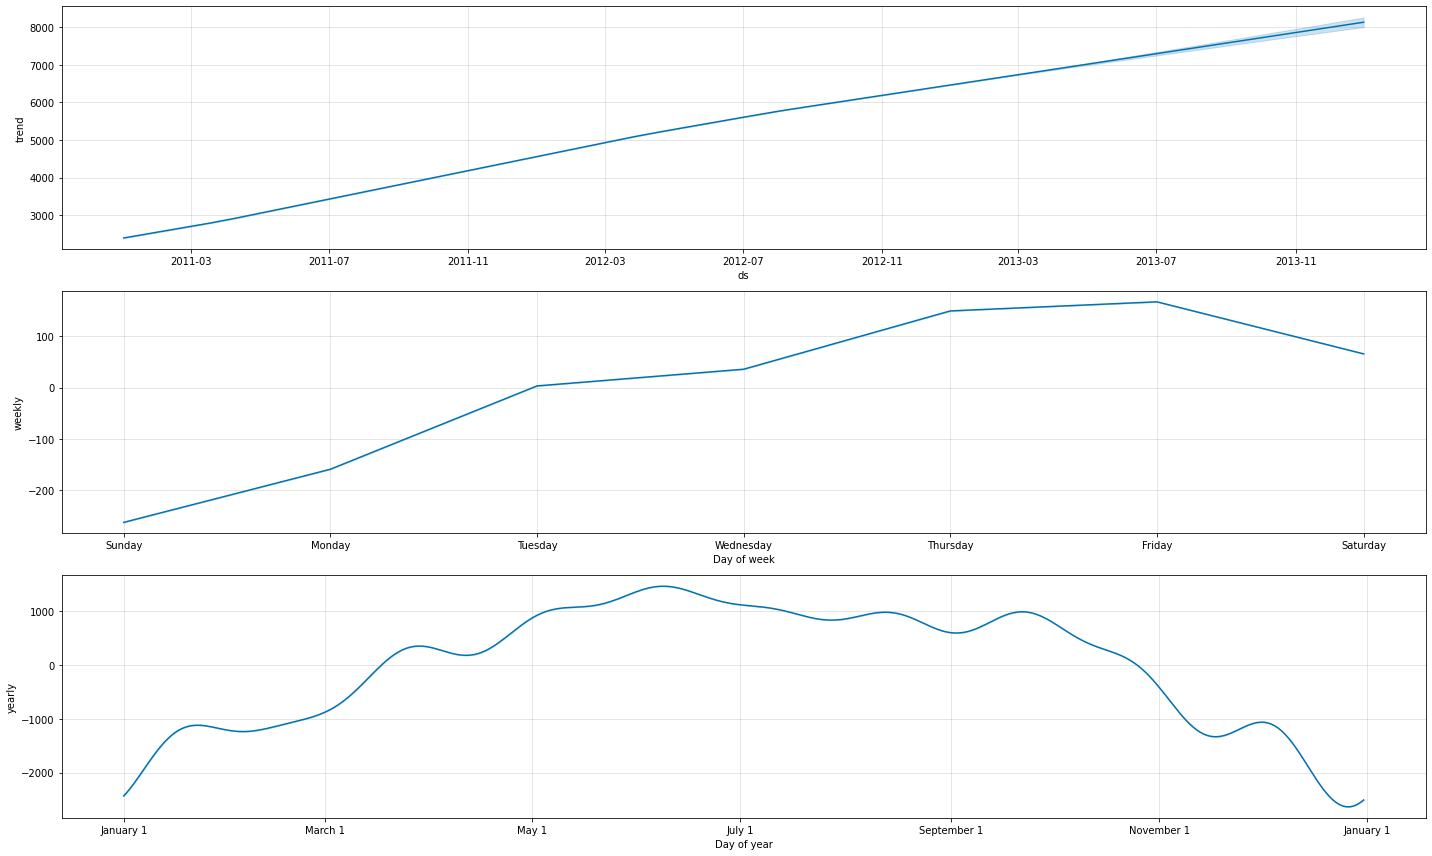

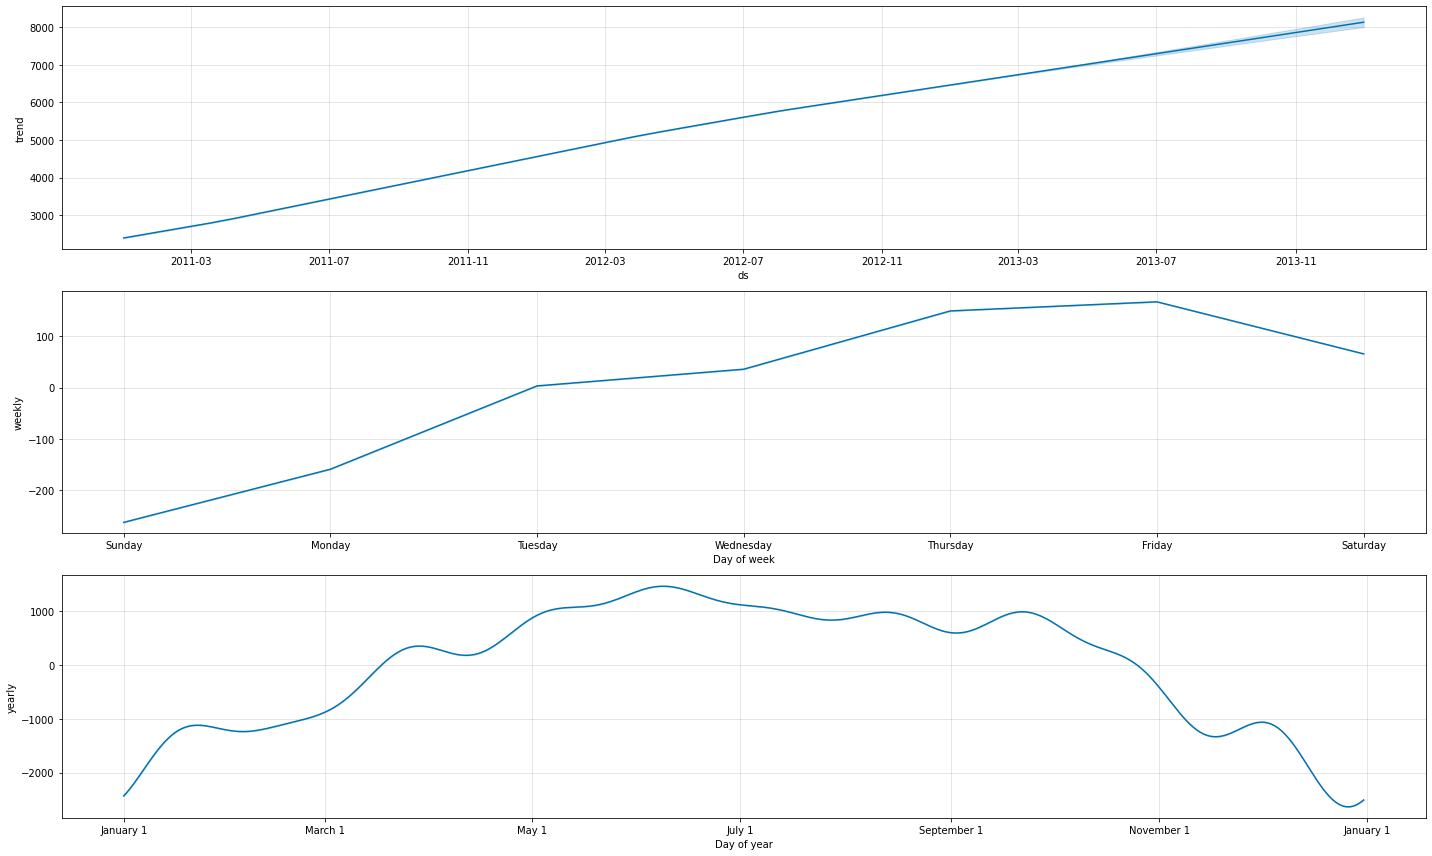

In [ ]:
from fbprophet.plot import plot_components
plot_components(m=m,fcst=forecast, figsize=(20, 12))
#m.plot_components(forecast);

# Deep Learning

In [ ]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
import seaborn as sns
#os.chdir('data')
#os.chdir('/content/drive/MyDrive/Colab Notebooks/IBM-MachineLearning-ProfessionalCertification/Specialized Models - Time Series and Survival Analysis')
#from colorsetup import colors, palette
plt.style.use('fivethirtyeight')
#sns.set_palette(palette)
import pandas as pd
from datetime import datetime
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
def get_n_last_days(df, series_name, n_days):
    """
    Extract last n_days of an hourly time series
    """
    
    return df[series_name][-(n_days):] 

def plot_n_last_days(df, series_name, n_days):
    """
    Plot last n_days of an hourly time series 
    """
    plt.figure(figsize = (30,5))   
    plt.plot(get_n_last_days(df, series_name, n_days), 'k-')
    plt.title('{0} Air Quality Time Series - {1} days'
              .format(series_name, n_days))
    plt.xlabel('Recorded Hour')
    plt.ylabel('Reading')
    plt.grid(alpha=0.3)


In [ ]:
def get_keras_format_series(series):
    """
    Convert a series to a numpy array of shape 
    [n_samples, time_steps, features]
    """
    
    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], 1)

def get_train_test_data(df, series_name, series_days, input_days, 
                        test_days, sample_gap=3):
    """
    Utility processing function that splits an hourly time series into 
    train and test with keras-friendly format, according to user-specified
    choice of shape.    
    
    arguments
    ---------
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    series_days (int): total days to extract
    input_days (int): length of sequence input to network 
    test_days (int): length of held-out terminal sequence
    sample_gap (int): step size between start of train sequences; default 5
    
    returns
    ---------
    tuple: train_X, test_X_init, train_y, test_y     
    """
    
    forecast_series = get_n_last_days(df, series_name, series_days).values # reducing our forecast series to last n days

    train = forecast_series[:-test_days] # training data is remaining days until amount of test_days
    test = forecast_series[-test_days:] # test data is the remaining test_days

    train_X, train_y = [], []

    # range 0 through # of train samples - input_days by sample_gap. 
    # This is to create many samples with corresponding
    for i in range(0, train.shape[0]-input_days, sample_gap): 
        train_X.append(train[i:i+input_days]) # each training sample is of length input hours
        train_y.append(train[i+input_days]) # each y is just the next step after training sample

    train_X = get_keras_format_series(train_X) # format our new training set to keras format
    train_y = np.array(train_y) # make sure y is an array to work properly with keras
    
    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_days] 
    test_y = test[input_days:] # test_y is remaining values from test set
    
    return train_X, test_X_init, train_y, test_y

In [ ]:
def fit_SimpleRNN(train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

In [ ]:
def predict(X_init, n_steps, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series      
    """
    
    X_init = X_init.copy().reshape(1,-1,1)
    preds = []
    
    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 11 values with 2nd through 12th
        X_init[:,-1,:] = pred # replace 12th value with prediction
    
    preds = np.array(preds).reshape(-1,1)
    
    return preds

def predict_and_plot(X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    
    y_preds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    print('Predictions =====>>>>')
    print (y_preds)
    print('<<<<<===== End Predictions')
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_days)  #predict range is going to be from end of X_init to length of test_days
    
    fig, ax = plt.subplots(figsize=(30,10))    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')
    #print (y_preds)
    
    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])

    return y_preds

In [ ]:
def fit_LSTM(train_X, train_y, cell_units, epochs):
    """
    Fit LSTM to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for LSTM cells  
    epochs (int): number of training epochs   
    """
    
    # initialize model
    model = Sequential() 
    
    # construct a LSTM layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1))) #,return_sequences= True))
    #model.add(LSTM(cell_units_l2, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

In [ ]:
rpd=pd.DataFrame(rpd,columns=['cnt'])
rpd

,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


In [ ]:
series_days = 180
input_days = 12
test_days = 24

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(rpd, 'cnt', series_days, 
                         input_days, test_days))
    
model = fit_SimpleRNN(train_X, train_y, cell_units=10, epochs=10)

predict_and_plot(test_X_init, test_y, model,
                 'Simple RNN Predictions')

Predictions =====>>>>
[[39.591995]
 [39.57689 ]
 [39.576904]
 [39.576904]
 [39.576904]
 [39.576904]
 [39.576904]
 [39.576904]
 [39.576904]
 [39.576904]
 [39.576904]
 [39.576904]]
<<<<<===== End Predictions


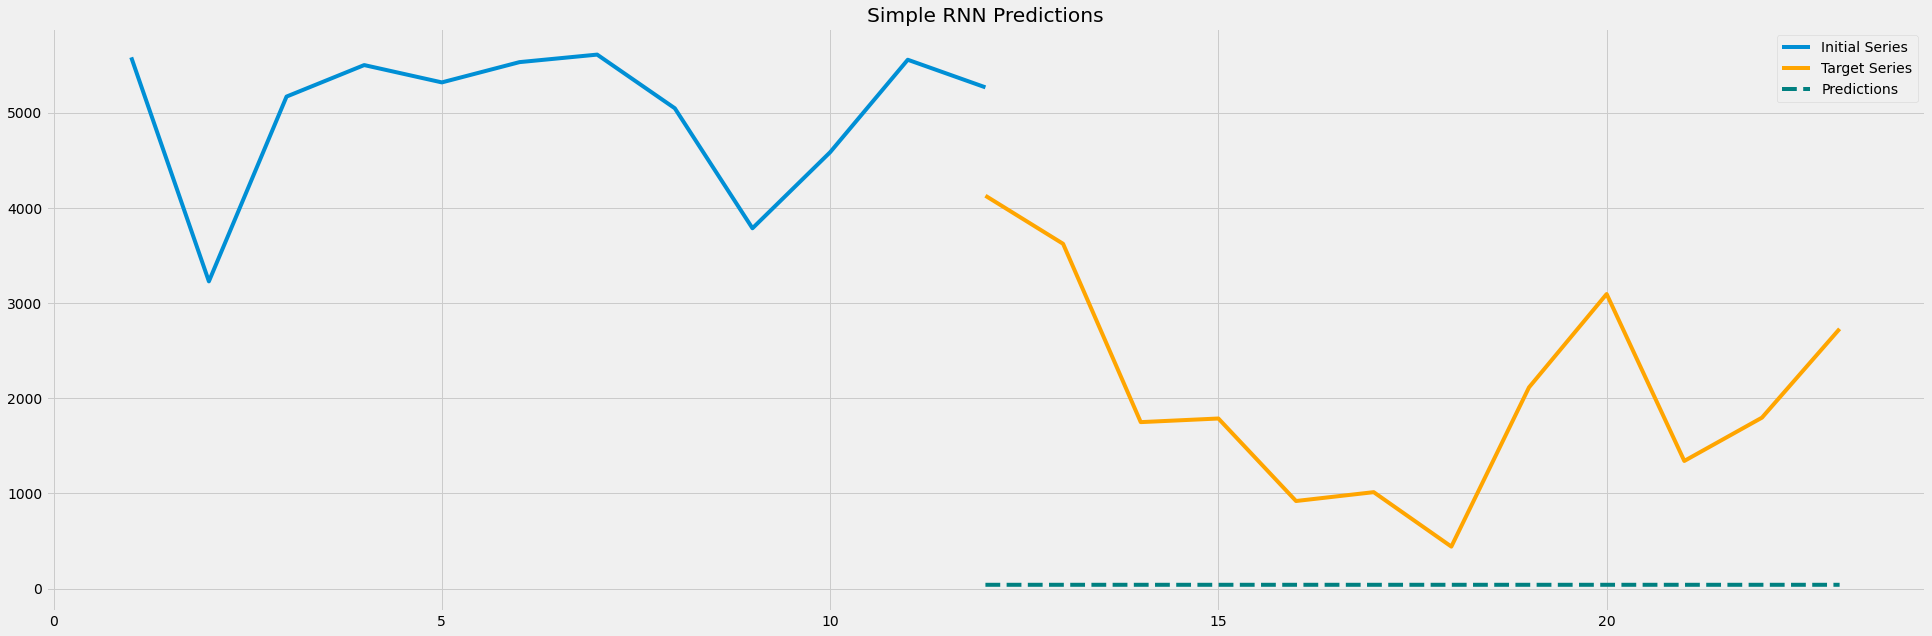

In [ ]:
series_days = 180
input_days = 12
test_days = 24

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(rpd, 'cnt', series_days, 
                         input_days, test_days))
    
model = fit_SimpleRNN(train_X, train_y, cell_units=30, epochs=1200)
preds=predict_and_plot(test_X_init, test_y, model,
                 'Simple RNN Predictions')

Predictions =====>>>>
[[2212.9255]
 [2212.9255]
 [2212.9255]
 [2212.9255]
 [2212.9255]
 [2212.9255]
 [2212.9255]
 [2212.9255]
 [2212.9255]
 [2212.9255]
 [2212.9255]
 [2212.9255]]
<<<<<===== End Predictions


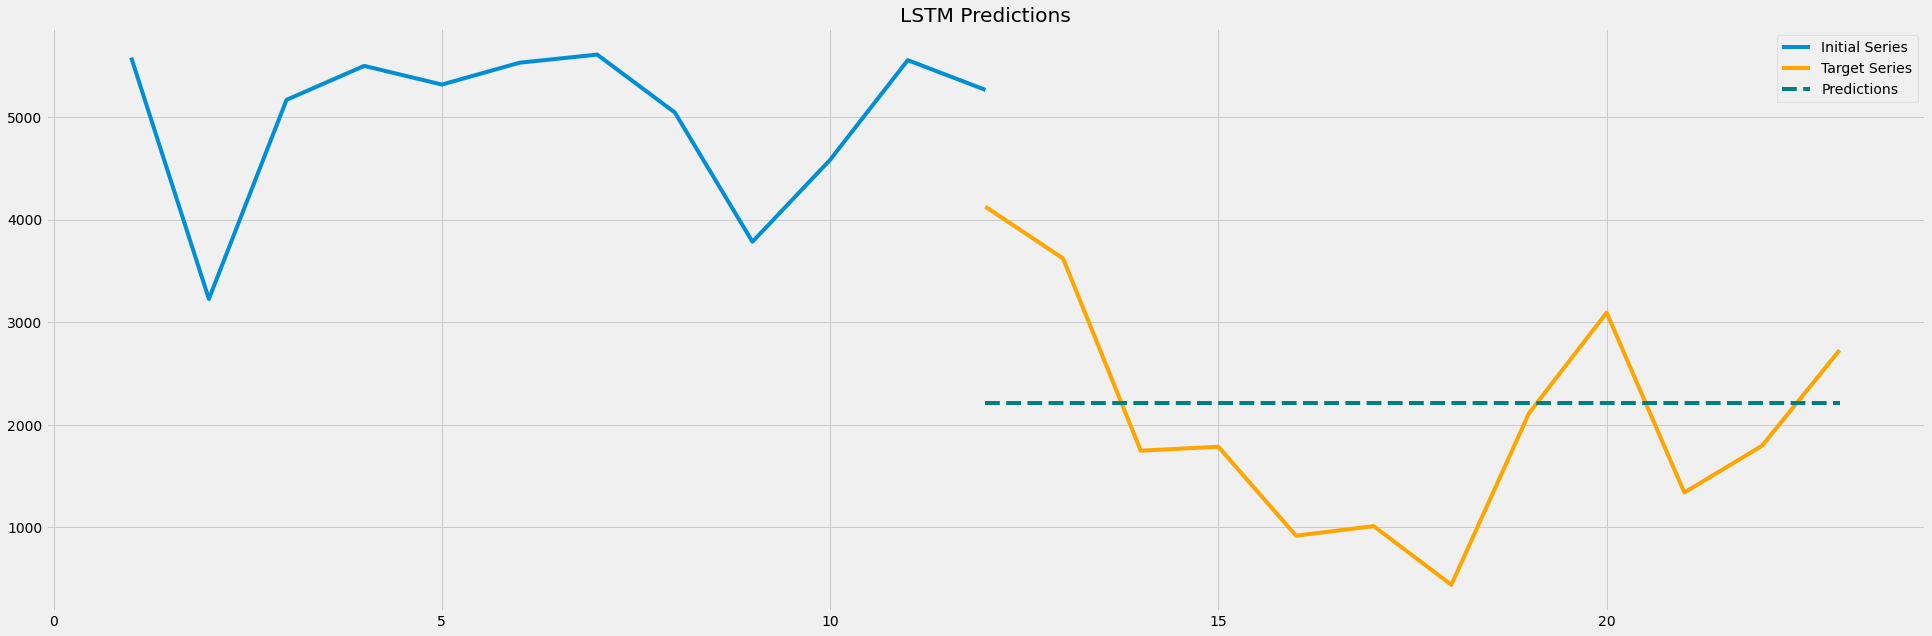

In [ ]:
series_days = 730
input_days = 12
test_days = 24

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(rpd, 'cnt', series_days, 
                         input_days, test_days))

model = fit_LSTM(train_X, train_y, cell_units=360, epochs=2500) 

preds = predict_and_plot(test_X_init, test_y, model, 
                 'LSTM Predictions')

Predictions =====>>>>
[[1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]
 [1983.934]]
<<<<<===== End Predictions


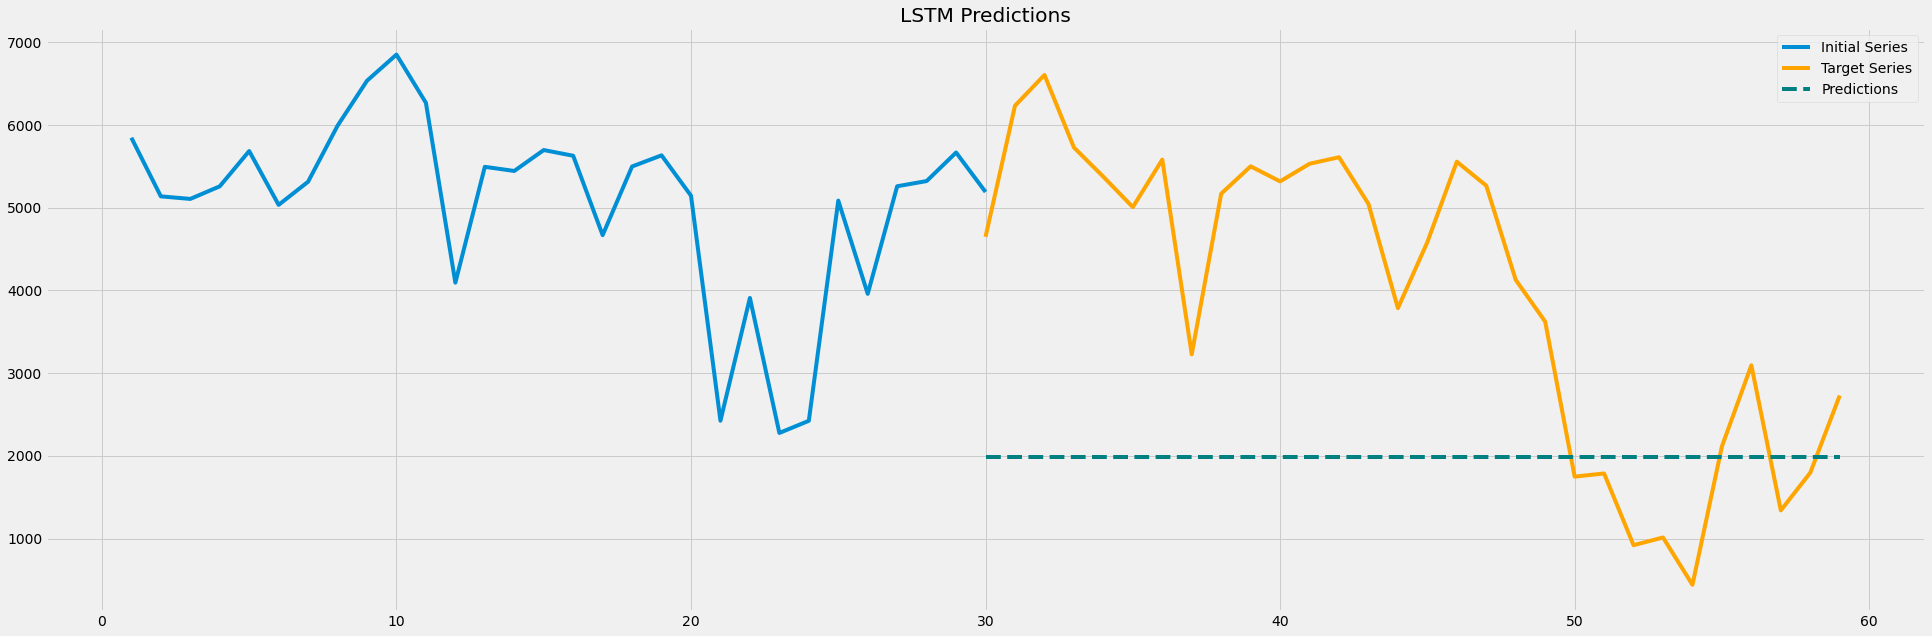

In [ ]:
series_days = 730
input_days = 30
test_days = 60

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(rpd, 'cnt', series_days, 
                         input_days, test_days))

model = fit_LSTM(train_X, train_y, cell_units=360, epochs=2500) 

preds = predict_and_plot(test_X_init, test_y, model, 
                 'LSTM Predictions')

Predictions =====>>>>
[[206.42365]
 [206.17975]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.1798 ]
 [206.17978]
 [206.17976]
 [206.17961]
 [206.17871]
 [206.17188]
 [206.22803]
 [206.22803]
 [206.22803]]
<<<<<===== End Predictions


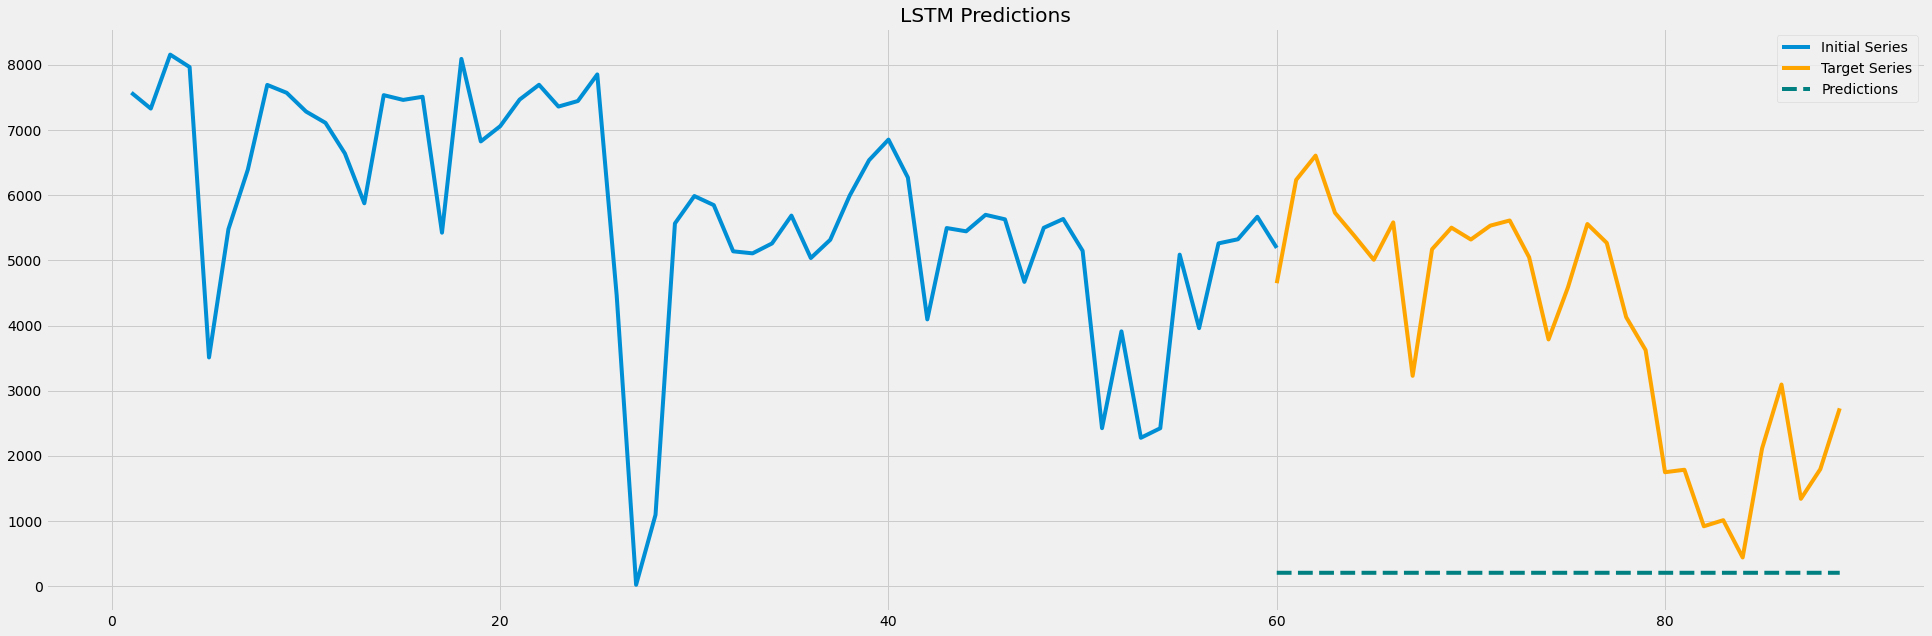

In [ ]:
series_days = 730
input_days = 60
test_days = 90

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(rpd, 'cnt', series_days, 
                         input_days, test_days))

model = fit_LSTM(train_X, train_y, cell_units=60, epochs=2500) 

preds = predict_and_plot(test_X_init, test_y, model, 
                 'LSTM Predictions')

## Try activation functions

In [ ]:
def fit_LSTM2(train_X, train_y, cell_units, epochs,activation='tanh',recurrent_activation='sigmoid'):
    """
    Fit LSTM to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for LSTM cells  
    epochs (int): number of training epochs   
    """
    
    # initialize model
    model = Sequential() 
    
    # construct a LSTM layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1),activation=activation,recurrent_activation=recurrent_activation)) #,return_sequences= True))
    #model.add(LSTM(cell_units_l2, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    #model.add(Dense(1,activation=activation))
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

Predictions =====>>>>
[[4884.344 ]
 [4738.107 ]
 [4908.1226]
 [5157.9136]
 [5117.9756]
 [4825.0215]
 [4699.967 ]
 [4682.9907]
 [4716.3374]
 [4826.376 ]
 [4806.0303]
 [4650.5234]]
<<<<<===== End Predictions


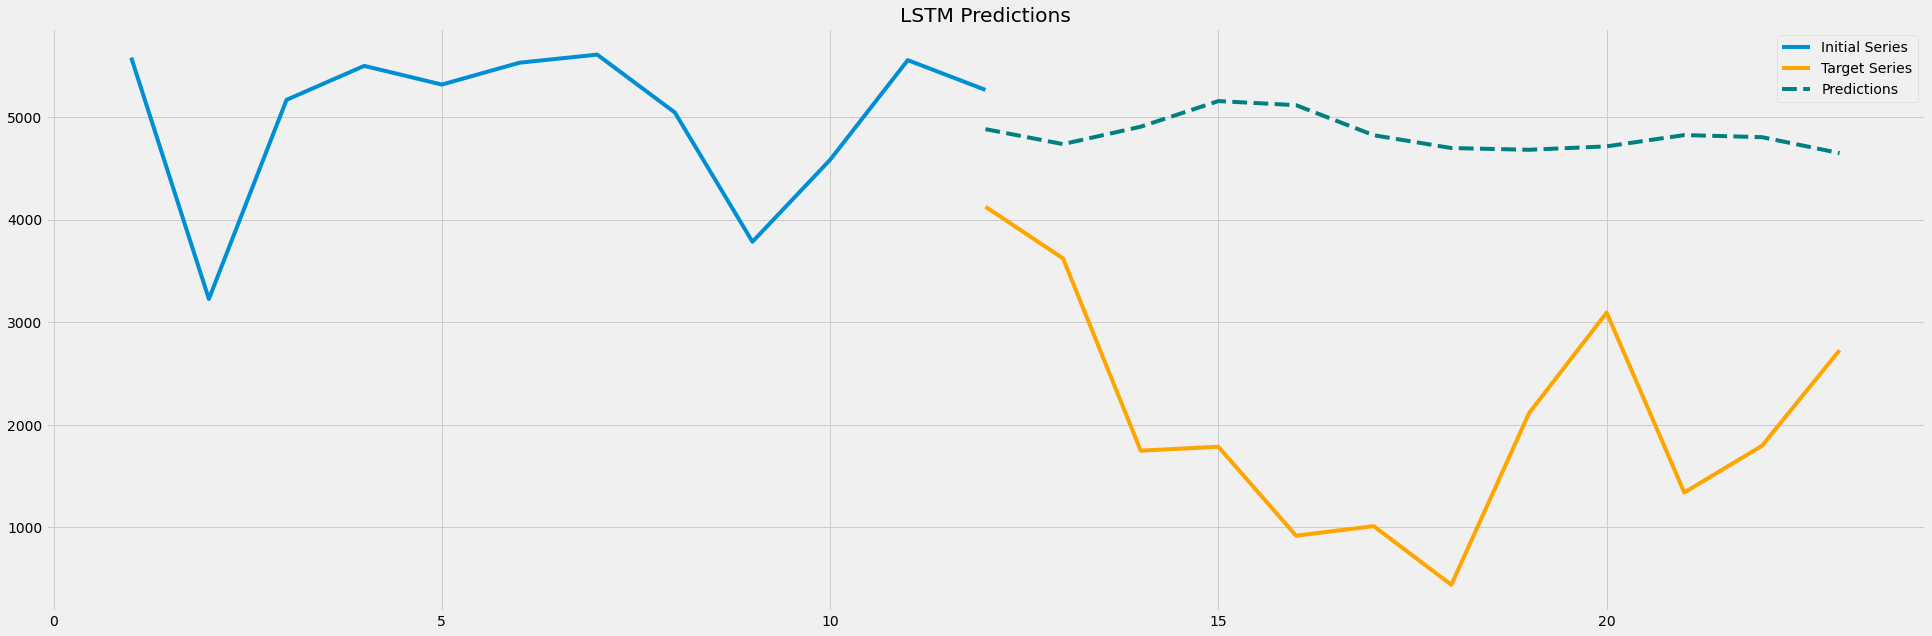

In [ ]:
series_days = 730
input_days = 12
test_days = 24

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(rpd, 'cnt', series_days, 
                         input_days, test_days))

model = fit_LSTM2(train_X, train_y, cell_units=360, epochs=3000,activation='relu',recurrent_activation='sigmoid') 

preds = predict_and_plot(test_X_init, test_y, model, 
                 'LSTM Predictions')

Predictions =====>>>>
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan

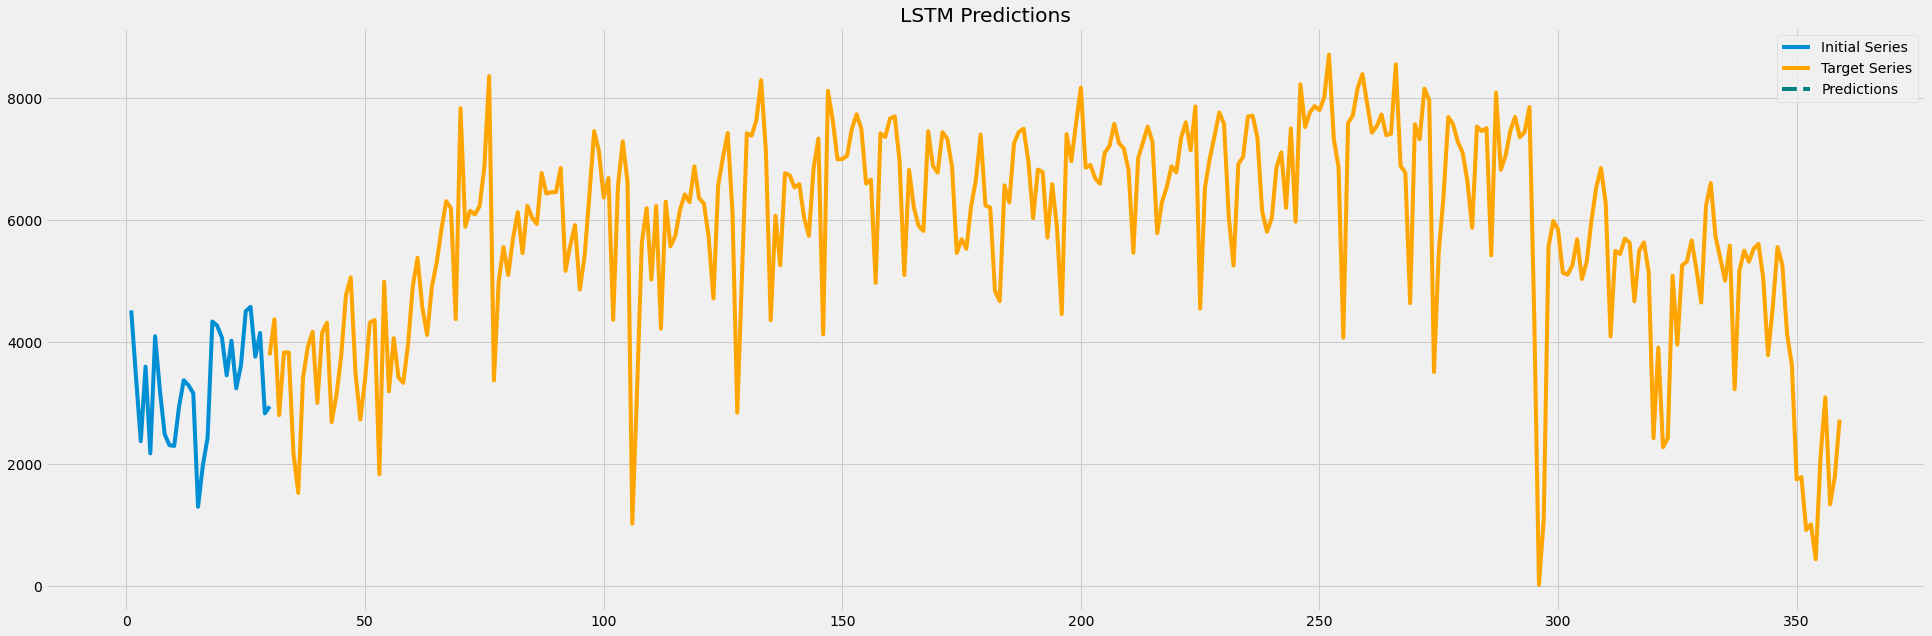

In [ ]:
series_days = 730
input_days = 30
test_days = 360

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(rpd, 'cnt', series_days, 
                         input_days, test_days))

model = fit_LSTM2(train_X, train_y, cell_units=360, epochs=3000,activation='relu',recurrent_activation='sigmoid') 

preds = predict_and_plot(test_X_init, test_y, model, 
                 'LSTM Predictions')

Predictions =====>>>>
[[3161.5312 ]
 [3242.399  ]
 [3302.7227 ]
 [3281.9385 ]
 [3285.278  ]
 [3231.874  ]
 [3214.896  ]
 [3220.055  ]
 [3268.3257 ]
 [3264.7925 ]
 [3268.3884 ]
 [3247.781  ]
 [3244.1887 ]
 [3274.9675 ]
 [3312.4854 ]
 [3321.0413 ]
 [3334.329  ]
 [3371.376  ]
 [3313.8748 ]
 [3287.3105 ]
 [3271.306  ]
 [3227.1147 ]
 [3227.4946 ]
 [3147.9385 ]
 [3127.1833 ]
 [3102.5269 ]
 [3039.0735 ]
 [3032.925  ]
 [3023.7012 ]
 [3017.075  ]
 [3009.4487 ]
 [3000.948  ]
 [2992.3164 ]
 [2986.3435 ]
 [2981.046  ]
 [2976.3674 ]
 [2973.5354 ]
 [2967.9678 ]
 [2961.2078 ]
 [2953.1023 ]
 [2943.682  ]
 [2931.795  ]
 [2919.7168 ]
 [2905.9724 ]
 [2890.1301 ]
 [2873.5527 ]
 [2856.899  ]
 [2837.1755 ]
 [2818.7654 ]
 [2801.551  ]
 [2786.6428 ]
 [2773.0713 ]
 [2760.421  ]
 [2748.5625 ]
 [2737.397  ]
 [2726.711  ]
 [2716.609  ]
 [2706.998  ]
 [2697.4648 ]
 [2688.0413 ]
 [2678.4988 ]
 [2668.5823 ]
 [2658.447  ]
 [2648.0286 ]
 [2637.328  ]
 [2626.146  ]
 [2614.653  ]
 [2602.6655 ]
 [2590.3716 ]
 [2577.9377 

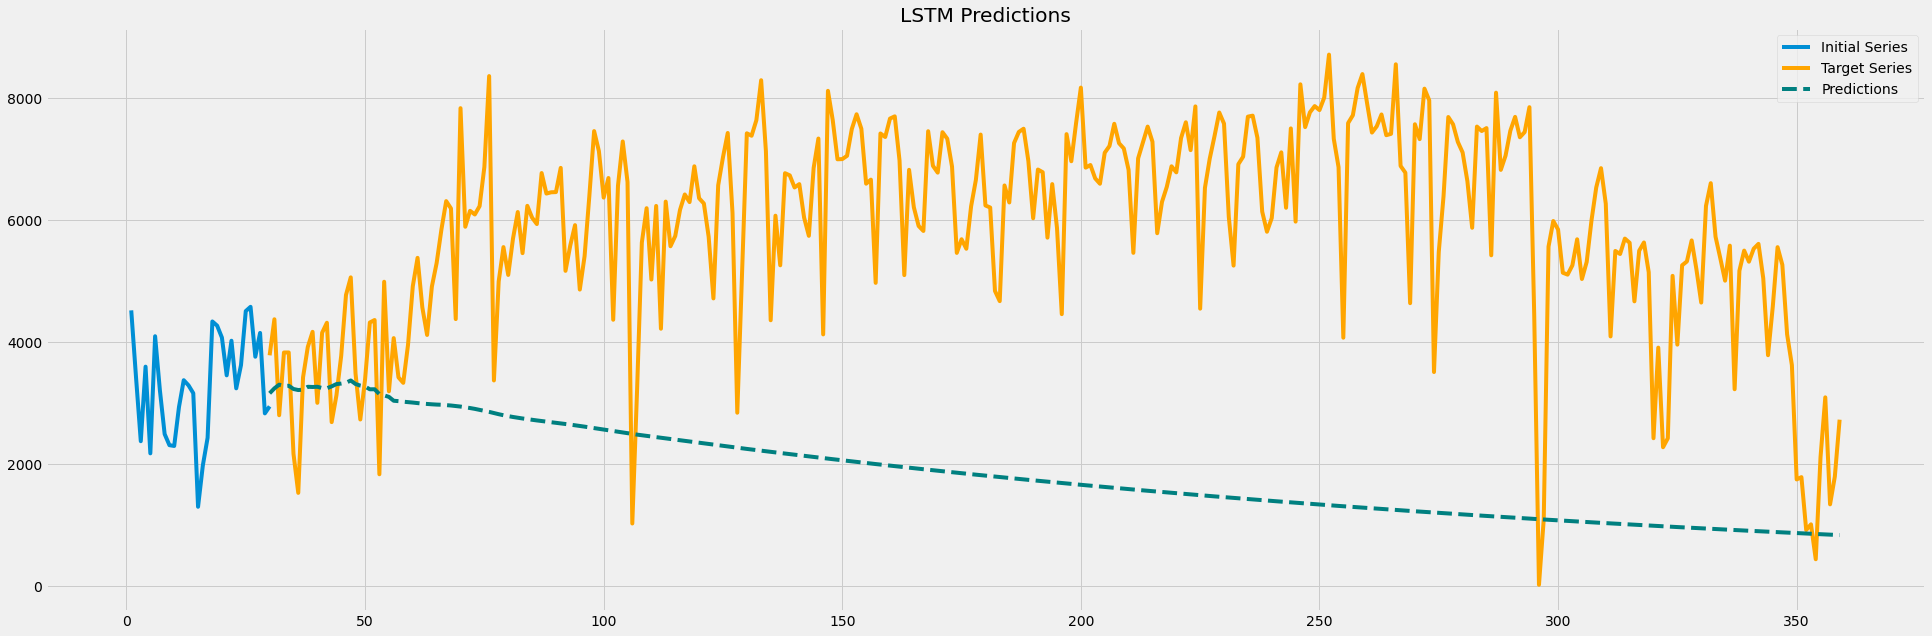

In [ ]:
series_days = 730
input_days = 30
test_days = 360

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(rpd, 'cnt', series_days, 
                         input_days, test_days))

model = fit_LSTM2(train_X, train_y, cell_units=60, epochs=3000,activation='relu',recurrent_activation='sigmoid') 

preds = predict_and_plot(test_X_init, test_y, model, 
                 'LSTM Predictions')

Predictions =====>>>>
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan

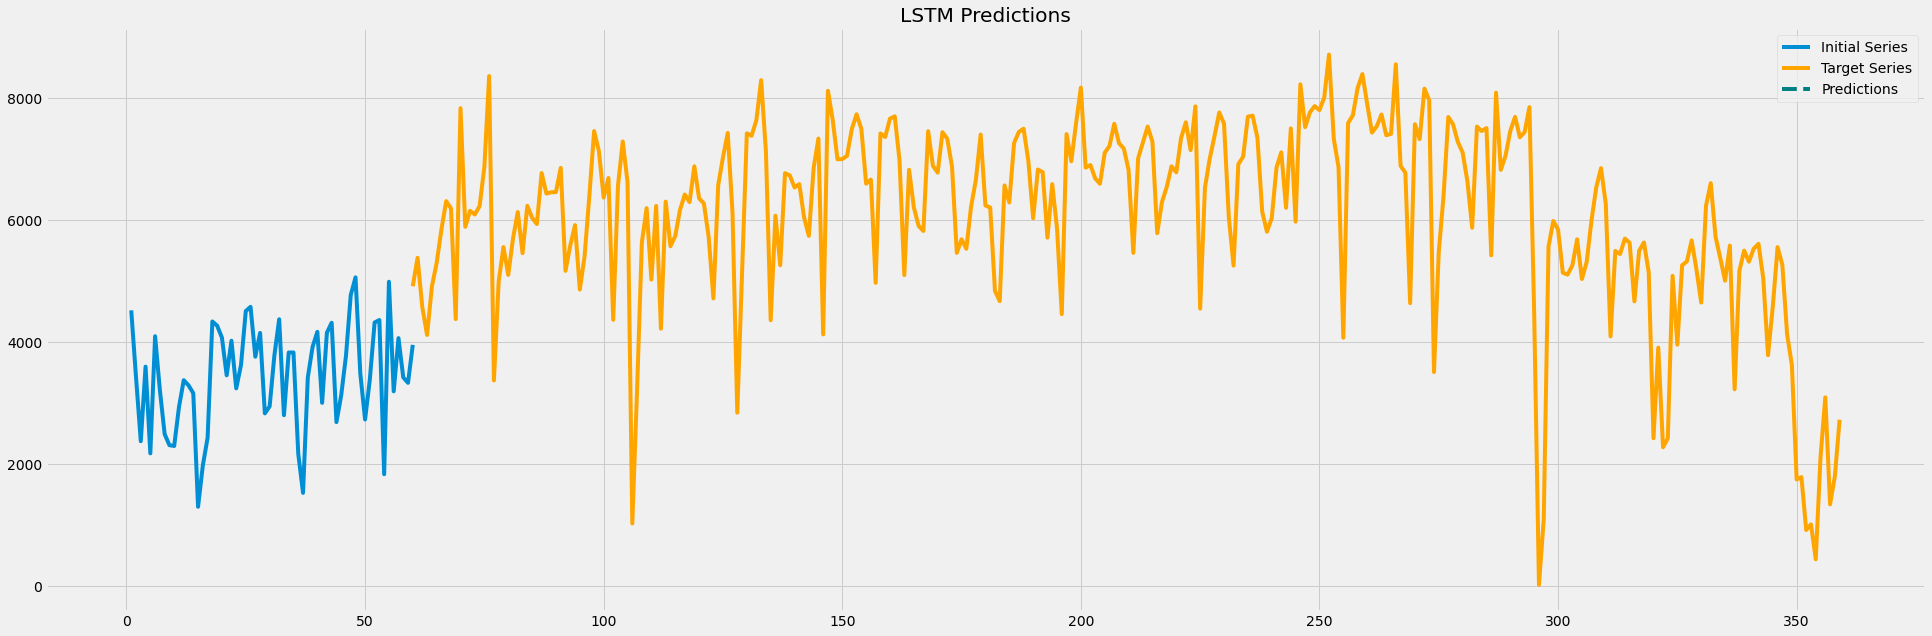

In [ ]:
series_days = 730
input_days = 60
test_days = 360

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(rpd, 'cnt', series_days, 
                         input_days, test_days))

model = fit_LSTM2(train_X, train_y, cell_units=60, epochs=3000,activation='relu',recurrent_activation='sigmoid') 

preds = predict_and_plot(test_X_init, test_y, model, 
                 'LSTM Predictions')

Predictions =====>>>>
[[3820.7383]
 [3207.24  ]
 [3509.1572]
 [3462.5623]
 [3481.7458]
 [3091.4312]
 [3416.4602]
 [3751.992 ]
 [3243.0388]
 [2591.1555]
 [3642.1833]
 [2866.9243]
 [2939.241 ]
 [3049.266 ]
 [3527.73  ]
 [3899.5002]
 [3540.1963]
 [3665.9739]
 [4918.453 ]
 [3686.9883]
 [2940.243 ]
 [3145.843 ]
 [4611.4253]
 [4254.4556]
 [3679.388 ]
 [3128.6467]
 [3551.1895]
 [3309.5437]
 [3963.1074]
 [4095.1328]
 [4163.011 ]
 [3868.8171]
 [3418.5852]
 [3620.4094]
 [3201.2588]
 [3247.592 ]
 [3863.8025]
 [3554.6135]
 [3470.7107]
 [3437.5059]
 [3478.3513]
 [3553.4824]
 [3847.2239]
 [3282.8594]
 [3313.166 ]
 [3429.6692]
 [3444.7627]
 [3374.079 ]
 [3719.4622]
 [3550.5684]
 [3763.1602]
 [3861.9443]
 [4980.191 ]
 [3299.2478]
 [3388.6006]
 [3298.49  ]
 [3829.145 ]
 [3524.08  ]
 [3607.9697]
 [3360.1357]
 [3404.281 ]
 [3366.6382]
 [3978.4412]
 [3773.3616]
 [4129.201 ]
 [3632.4573]
 [3436.9524]
 [3513.628 ]
 [3678.6091]
 [3364.1821]
 [3695.0068]
 [3748.1262]
 [3812.9702]
 [3683.626 ]
 [3778.3215]
 [3

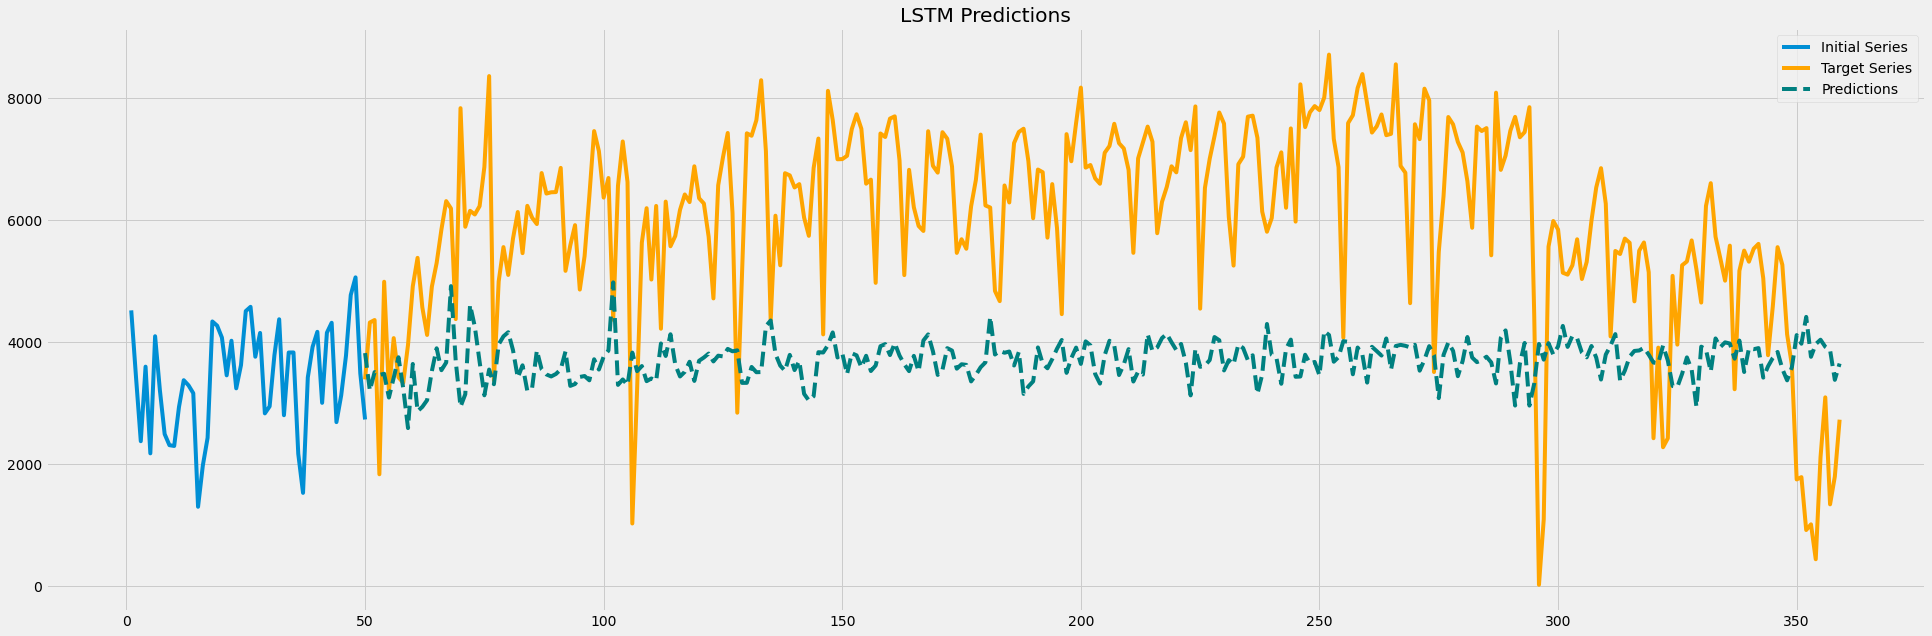

In [ ]:
series_days = 730
input_days = 50
test_days = 360

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(rpd, 'cnt', series_days, 
                         input_days, test_days))

model = fit_LSTM2(train_X, train_y, cell_units=60, epochs=3000,activation='relu',recurrent_activation='sigmoid') 

preds = predict_and_plot(test_X_init, test_y, model, 
                 'LSTM Predictions')

Predictions =====>>>>
[[  5.981176 ]
 [270.8949   ]
 [ 13.983391 ]
 [  5.4788384]
 [  6.4305954]
 [  5.978309 ]
 [  5.26857  ]
 [  5.9095407]
 [  5.9347343]
 [  6.1907463]
 [  6.117888 ]
 [  6.1846128]
 [  6.1202903]
 [  6.0044246]
 [  5.867912 ]
 [  5.867688 ]
 [  5.794326 ]
 [  5.7573934]
 [  5.696454 ]
 [  5.6530952]
 [  5.68754  ]
 [  5.8262095]
 [  5.9836826]
 [  6.034346 ]
 [  6.0636673]
 [  6.8152556]
 [  6.622532 ]
 [  6.4381285]
 [  6.2742357]
 [  6.1683064]
 [  6.0153403]
 [  6.0129585]
 [  5.9937844]
 [  6.0032086]
 [  5.994151 ]
 [  6.0042186]
 [  5.994722 ]
 [  6.004615 ]
 [  5.994947 ]
 [  6.0047083]
 [  5.9949484]
 [  6.004593 ]
 [  5.9948435]
 [  6.0044403]
 [  5.994717 ]
 [  6.0043216]
 [  5.9946494]
 [  6.004232 ]
 [  5.9945736]
 [  6.0041413]
 [  5.9944987]
 [  6.0040565]
 [  5.994429 ]
 [  6.0039787]
 [  5.994332 ]
 [  6.003841 ]
 [  5.994227 ]
 [  6.003738 ]
 [  5.9941497]
 [  6.0036626]
 [  5.994094 ]
 [  6.003609 ]
 [  5.9940557]
 [  6.003609 ]
 [  5.9940557]
 [ 

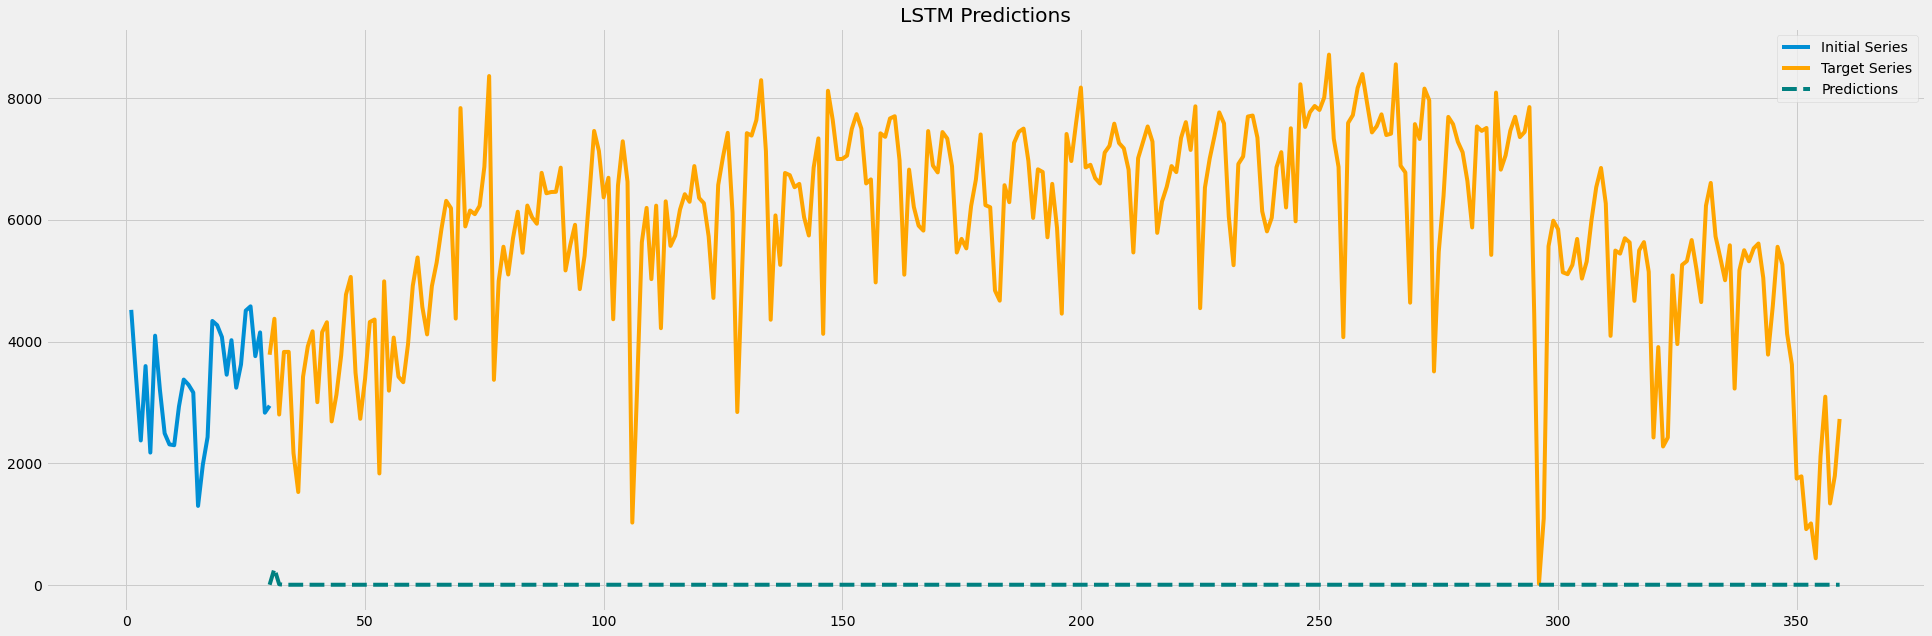

In [ ]:
series_days = 730
input_days = 30
test_days = 360

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(rpd, 'cnt', series_days, 
                         input_days, test_days))

model = fit_LSTM2(train_X, train_y, cell_units=35, epochs=3000,activation='relu',recurrent_activation='sigmoid') 

preds = predict_and_plot(test_X_init, test_y, model, 
                 'LSTM Predictions')

Predictions =====>>>>
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan

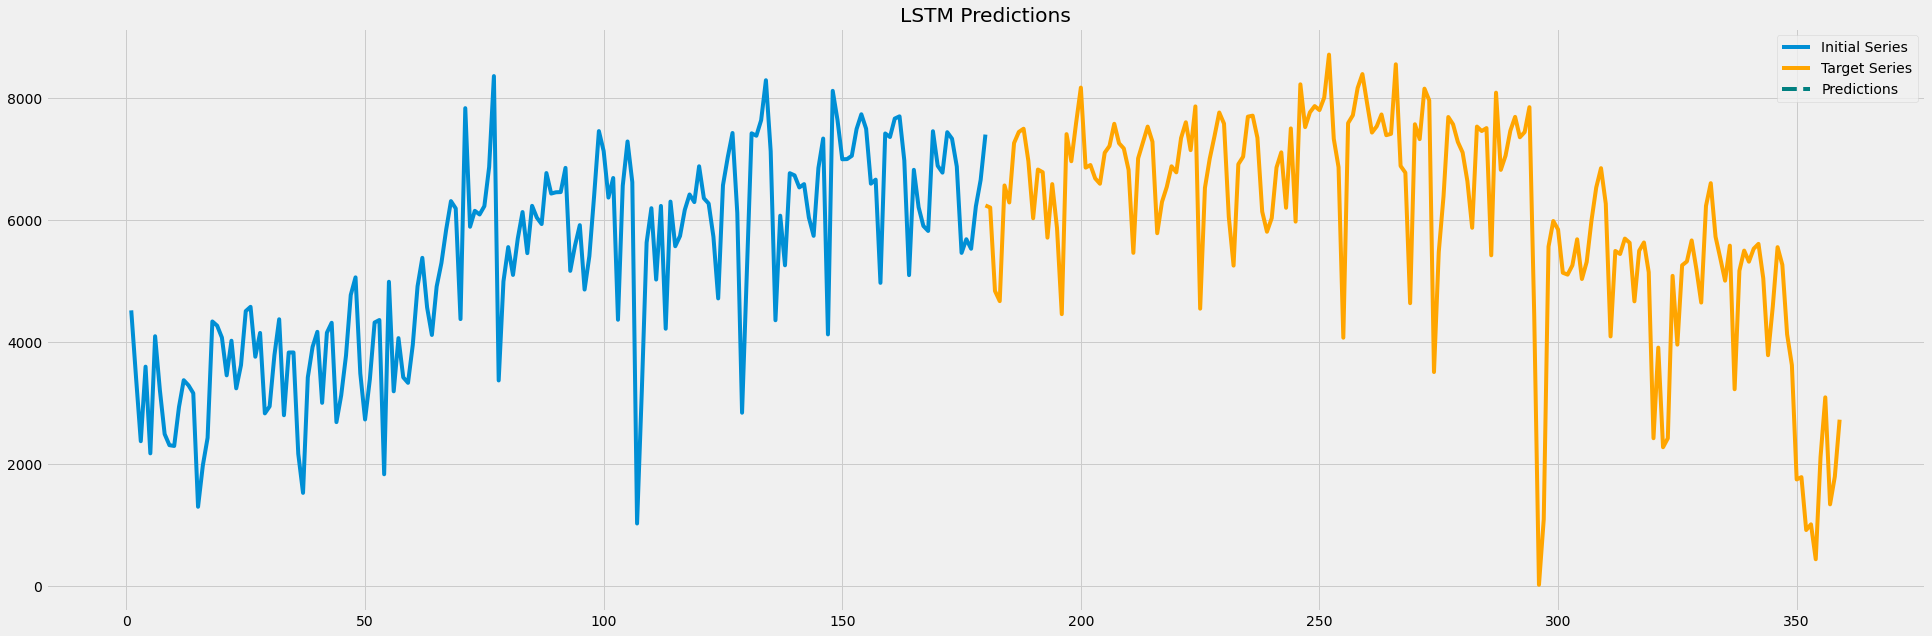

In [ ]:
series_days = 730
input_days = 180
test_days = 360

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(rpd, 'cnt', series_days, 
                         input_days, test_days))

model = fit_LSTM2(train_X, train_y, cell_units=190, epochs=3000,activation='relu',recurrent_activation='sigmoid') 

preds = predict_and_plot(test_X_init, test_y, model, 
                 'LSTM Predictions')

Predictions =====>>>>
[[7098.767 ]
 [7165.1113]
 [7057.625 ]
 [6786.8887]
 [6664.5747]
 [6977.313 ]
 [7134.102 ]
 [7161.279 ]
 [7066.2207]
 [7060.4263]
 [6777.3125]
 [6709.506 ]
 [6715.983 ]
 [6739.865 ]
 [6800.0757]
 [6675.0034]
 [6549.765 ]
 [6627.0713]
 [6600.858 ]
 [6528.8823]
 [6475.321 ]
 [6398.7876]
 [6242.1943]
 [6143.8022]
 [5980.7925]
 [5533.927 ]
 [5776.9707]
 [6368.4365]
 [6913.8745]
 [7108.4937]
 [7183.1035]
 [7168.7827]
 [7146.408 ]
 [7135.662 ]
 [7148.482 ]
 [7119.725 ]
 [7145.6787]
 [7105.539 ]
 [7009.886 ]
 [7028.0645]
 [6993.952 ]
 [6980.4736]
 [6971.014 ]
 [6959.142 ]
 [6886.2954]
 [6866.598 ]
 [6856.2734]
 [6852.116 ]
 [6843.492 ]
 [6890.049 ]
 [6851.675 ]
 [6843.376 ]
 [6852.159 ]
 [6912.1924]
 [6930.013 ]
 [7023.451 ]
 [7184.24  ]
 [7343.46  ]
 [7413.7437]
 [7434.7925]]
<<<<<===== End Predictions


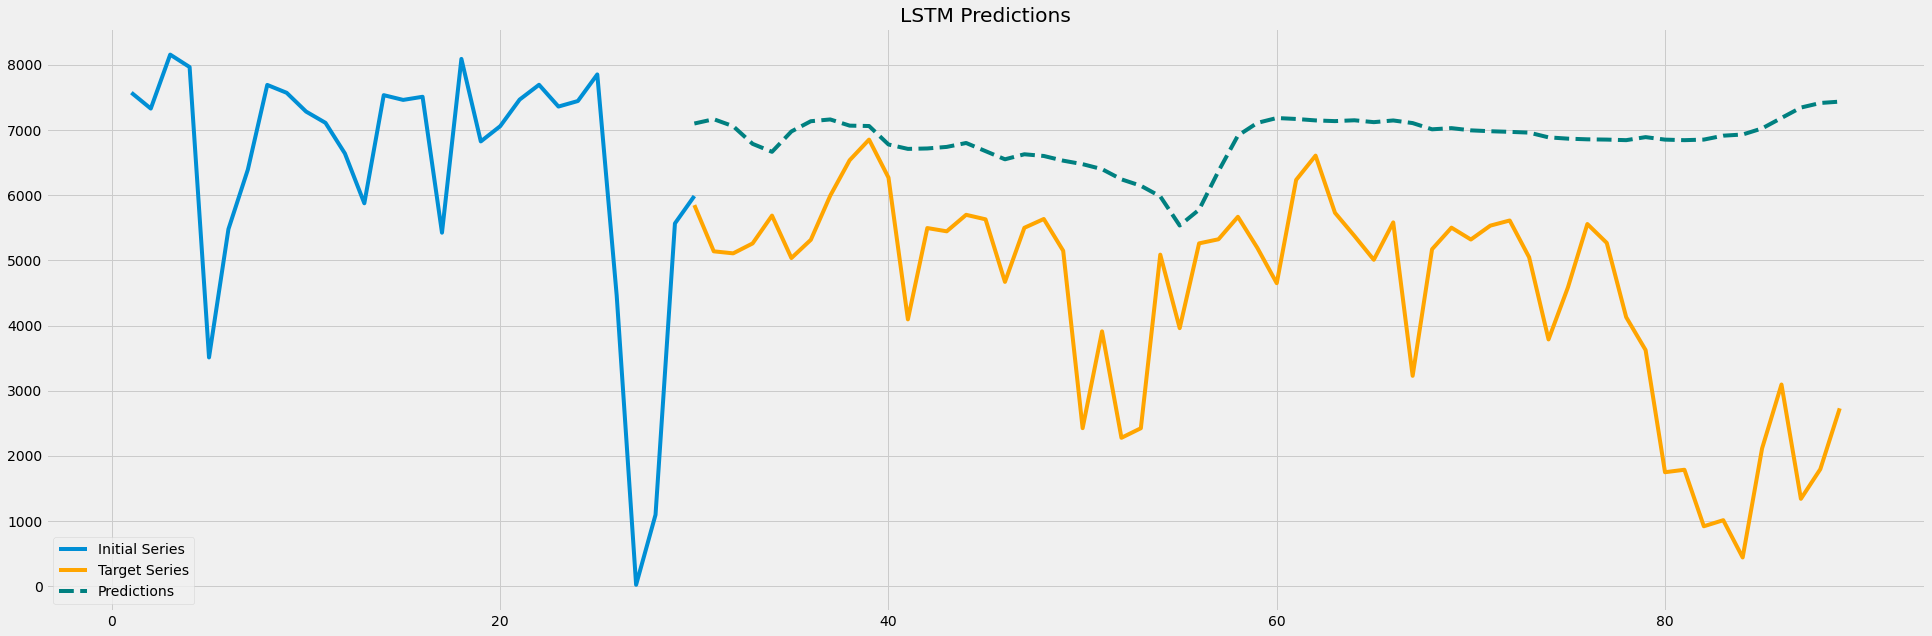

In [ ]:
series_days = 730
input_days = 30
test_days = 90

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(rpd, 'cnt', series_days, 
                         input_days, test_days))

model = fit_LSTM2(train_X, train_y, cell_units=35, epochs=3000,activation='relu',recurrent_activation='sigmoid') 

preds = predict_and_plot(test_X_init, test_y, model, 
                 'LSTM Predictions')